In [11]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [12]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('1', '1', '0', '1', '1', '0', '0', '1')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ A □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [13]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import xcs_metrics
from utils.nxcs_utils import xcs_maze_metrics

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_maze_metrics,
                    lmc=10,
                    lem=200)


In [14]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 10
explore = 2000
exploit = 500

df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=explore,
             exploit_trials=exploit)

df_other = XNCSExp(maze=maze,
             cfg=XNCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=explore,
             exploit_trials=exploit)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 0.06253820000000587, 'population': 126, 'numerosity': 165, 'average_specificity': 7.096969696969697, 'fraction_accuracy': 1.0}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 78, 'reward': 1000.000000002505, 'perf_time': 0.27959270000002334, 'population': 396, 'numerosity': 1608, 'average_specificity': 1.4987562189054726, 'fraction_accuracy': 4.2643295759091064e-14}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 91, 'reward': 1000.0000000000439, 'perf_time': 0.4170358999999735, 'population': 384, 'numerosity': 1600, 'average_specificity': 1.58625, 'fraction_accuracy': 2.1415101542369858e-16}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 100, 'reward': 1.3360874108439811e-12, 'perf_time': 0.33724660000007134, 'population': 425, 'numerosity': 1600, 'average_specificity': 1.925, 'fraction_accuracy': 5.124557041250983e-15}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 100, 'reward': 5.68865043410656e-87, 'perf_time': 0.4215346999999383, 'population': 433, 'numerosity': 1610, 'average_specificity': 1.8403726708074535, 'fraction_accuracy': 0.12500000000000894}
INFO:lcs.agents.Agent:{

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 41, 'reward': 1000.0008005705697, 'perf_time': 0.15911710000000312, 'population': 419, 'numerosity': 1615, 'average_specificity': 1.7362229102167184, 'fraction_accuracy': 2.4147610991807235e-16}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 15, 'reward': 1000.0, 'perf_time': 0.06484399999999368, 'population': 410, 'numerosity': 1612, 'average_specificity': 1.5955334987593053, 'fraction_accuracy': 7.652608216122318e-15}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 60, 'reward': 1000.0000011898738, 'perf_time': 0.22228180000001885, 'population': 444, 'numerosity': 1610, 'average_specificity': 1.595031055900621, 'fraction_accuracy': 5.447599868977616e-13}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 100, 'reward': 2.108551074529256e-27, 'perf_time': 0.42520569999999225, 'population': 422, 'numerosity': 1628, 'average_specificity': 1.5743243243243243, 'fraction_accuracy': 3.885602044115834e-15}
INFO:lcs.age

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 17, 'reward': 1002.9951776723689, 'perf_time': 0.0480265999999574, 'population': 390, 'numerosity': 1600, 'average_specificity': 1.46125, 'fraction_accuracy': 2.6043564886487426e-15}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 11, 'reward': 1027.2853430663188, 'perf_time': 0.052370399999972506, 'population': 420, 'numerosity': 1631, 'average_specificity': 1.6535867565910485, 'fraction_accuracy': 8.833758529872932e-15}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 18, 'reward': 1002.1020853204966, 'perf_time': 0.07165610000015477, 'population': 423, 'numerosity': 1601, 'average_specificity': 1.679575265459088, 'fraction_accuracy': 7.689101856570159e-14}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 26, 'reward': 1000.1357428823436, 'perf_time': 0.08341640000003281, 'population': 408, 'numerosity': 1600, 'average_specificity': 1.70875, 'fraction_accuracy': 1.7389227073475782e-15}
INFO:lcs.agents.Agent:{'t

Executing 3 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 6, 'reward': 1128.1014068025777, 'perf_time': 0.020035099999859085, 'population': 394, 'numerosity': 1620, 'average_specificity': 1.4654320987654321, 'fraction_accuracy': 1.349897576372841e-15}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 2, 'reward': 1568.6815767455803, 'perf_time': 0.003869000000122469, 'population': 393, 'numerosity': 1600, 'average_specificity': 1.526875, 'fraction_accuracy': 3.399021900813915e-14}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 15, 'reward': 1006.9330696106316, 'perf_time': 0.058421700000053534, 'population': 443, 'numerosity': 1605, 'average_specificity': 1.6679127725856697, 'fraction_accuracy': 0.1250000000000013}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 47, 'reward': 1000.0001021274269, 'perf_time': 0.16425050000020747, 'population': 434, 'numerosity': 1600, 'average_specificity': 1.74875, 'fraction_accuracy': 5.64360981821192e-13}
INFO:lcs.agents.Agent:{'tria

Executing 4 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 14, 'reward': 1009.3441904942564, 'perf_time': 0.039277999999967506, 'population': 381, 'numerosity': 1601, 'average_specificity': 1.4022485946283574, 'fraction_accuracy': 3.6707231430296775e-17}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 90, 'reward': 1000.000000000041, 'perf_time': 0.3325873999999658, 'population': 413, 'numerosity': 1604, 'average_specificity': 1.770573566084788, 'fraction_accuracy': 2.384279962823558e-16}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 86, 'reward': 1000.0000000001615, 'perf_time': 0.32879240000011123, 'population': 417, 'numerosity': 1600, 'average_specificity': 1.576875, 'fraction_accuracy': 1.6474561771229593e-14}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 100, 'reward': 1.7851295693460595e-27, 'perf_time': 0.43176279999988765, 'population': 423, 'numerosity': 1602, 'average_specificity': 2.0299625468164795, 'fraction_accuracy': 4.884918419637674e-13}
INFO:lcs.

Executing 5 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 100, 'reward': 1.3360874109624846e-12, 'perf_time': 0.3772610999999415, 'population': 397, 'numerosity': 1600, 'average_specificity': 1.538125, 'fraction_accuracy': 8.13230256674537e-15}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 6, 'reward': 1128.100283921, 'perf_time': 0.019781399999828864, 'population': 416, 'numerosity': 1604, 'average_specificity': 1.8341645885286784, 'fraction_accuracy': 3.597178797605008e-16}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 100, 'reward': 1.3360874796029265e-12, 'perf_time': 0.30546060000006037, 'population': 391, 'numerosity': 1600, 'average_specificity': 1.614375, 'fraction_accuracy': 5.845693579350476e-15}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 10, 'reward': 1032.5524355100988, 'perf_time': 0.03257949999988341, 'population': 375, 'numerosity': 1600, 'average_specificity': 1.41625, 'fraction_accuracy': 2.0539538709219464e-16}
INFO:lcs.agents.Agent:{'trial'

Executing 6 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 25, 'reward': 1000.1911937699123, 'perf_time': 0.09021819999998115, 'population': 410, 'numerosity': 1601, 'average_specificity': 1.5084322298563397, 'fraction_accuracy': 3.228471125356339e-15}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 18, 'reward': 1002.1022335419653, 'perf_time': 0.06696229999988645, 'population': 410, 'numerosity': 1614, 'average_specificity': 1.5272614622057001, 'fraction_accuracy': 2.2295874695586672e-14}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 3, 'reward': 1357.9133787692253, 'perf_time': 0.011399499999697582, 'population': 382, 'numerosity': 1600, 'average_specificity': 1.73625, 'fraction_accuracy': 5.460775293230958e-15}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 6, 'reward': 1160.6527194311195, 'perf_time': 0.026090900000326656, 'population': 416, 'numerosity': 1606, 'average_specificity': 1.526774595267746, 'fraction_accuracy': 9.812592824402959e-15}
INFO:lcs.agents

Executing 7 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 21, 'reward': 1000.7523593509238, 'perf_time': 0.06968349999988277, 'population': 371, 'numerosity': 1610, 'average_specificity': 1.4527950310559006, 'fraction_accuracy': 0.12500000000001335}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 41, 'reward': 1000.0007975482725, 'perf_time': 0.1564067000003888, 'population': 404, 'numerosity': 1600, 'average_specificity': 1.57875, 'fraction_accuracy': 1.428695801104816e-14}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 58, 'reward': 1000.0000023605072, 'perf_time': 0.2541174999996656, 'population': 438, 'numerosity': 1606, 'average_specificity': 1.9943960149439601, 'fraction_accuracy': 5.094903335799216e-15}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 100, 'reward': 1.3360874108181085e-12, 'perf_time': 0.3348968000000241, 'population': 398, 'numerosity': 1603, 'average_specificity': 1.357454772301934, 'fraction_accuracy': 7.156882366831464e-17}
INFO:lcs.agents.

Executing 8 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 43, 'reward': 1000.000401891661, 'perf_time': 0.16443040000012843, 'population': 395, 'numerosity': 1600, 'average_specificity': 1.4175, 'fraction_accuracy': 0.1250000000000181}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 55, 'reward': 1000.0000065949557, 'perf_time': 0.25189410000029966, 'population': 383, 'numerosity': 1600, 'average_specificity': 1.286875, 'fraction_accuracy': 4.129309945220834e-14}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 4, 'reward': 1000.0000000000003, 'perf_time': 0.02053169999999227, 'population': 438, 'numerosity': 1607, 'average_specificity': 1.9489732420659613, 'fraction_accuracy': 1.8445045581112144e-13}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 20, 'reward': 1000.0, 'perf_time': 0.08895499999971435, 'population': 424, 'numerosity': 1600, 'average_specificity': 1.52125, 'fraction_accuracy': 1.2180226948145115e-14}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_tria

Executing 9 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 53, 'reward': 1000.0000130827799, 'perf_time': 0.2034631999999874, 'population': 406, 'numerosity': 1600, 'average_specificity': 1.725, 'fraction_accuracy': 0.12500000000000114}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 9, 'reward': 1047.3895743489454, 'perf_time': 0.02639709999994011, 'population': 413, 'numerosity': 1601, 'average_specificity': 1.8182386008744535, 'fraction_accuracy': 2.4091870339489015e-13}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 100, 'reward': 1.5072411183932073e-12, 'perf_time': 0.3479869000002509, 'population': 428, 'numerosity': 1600, 'average_specificity': 1.544375, 'fraction_accuracy': 2.8546206410324585e-15}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 100, 'reward': 1.3360874108245214e-12, 'perf_time': 0.33475759999964794, 'population': 403, 'numerosity': 1602, 'average_specificity': 1.457553058676654, 'fraction_accuracy': 6.089597927727806e-16}
INFO:lcs.agents.Agent

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 33, 'reward': 1000.0123499025822, 'perf_time': 0.18606569999974454, 'numerosity': 1600, 'population': 545, 'average_specificity': 2.95875, 'fraction_accuracy': 4.636256068941959e-16}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 100, 'reward': 1.4104632447122616e-12, 'perf_time': 0.48045570000022053, 'numerosity': 1600, 'population': 582, 'average_specificity': 3.016875, 'fraction_accuracy': 1.0092941581915876e-16}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 12, 'reward': 1016.4096827406408, 'perf_time': 0.07082800000034695, 'numerosity': 1600, 'population': 626, 'average_specificity': 3.556875, 'fraction_accuracy': 3.457125697626894e-16}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 21, 'reward': 1000.7529253956782, 'perf_time': 0.10615089999964766, 'numerosity': 1600, 'population': 611, 'average_specificity': 3.74, 'fraction_accuracy': 2.1609613999100257e-15}
INFO:lcs.agents.Agent:{'trial': 1000, 'ste

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 2, 'reward': 1520.5096827406408, 'perf_time': 0.004910300000119605, 'numerosity': 1600, 'population': 537, 'average_specificity': 2.774375, 'fraction_accuracy': 5.065325744959843e-16}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 31, 'reward': 1000.0244943344543, 'perf_time': 0.16984469999988505, 'numerosity': 1600, 'population': 616, 'average_specificity': 3.46375, 'fraction_accuracy': 2.9896438105216747e-16}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 47, 'reward': 1000.000102127456, 'perf_time': 0.23393820000001142, 'numerosity': 1600, 'population': 635, 'average_specificity': 3.873125, 'fraction_accuracy': 8.628691452596491e-17}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 15, 'reward': 1007.0012950430714, 'perf_time': 0.09295259999998962, 'numerosity': 1600, 'population': 701, 'average_specificity': 4.40125, 'fraction_accuracy': 1.418437239746198e-16}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_i

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 61, 'reward': 1000.0000011363287, 'perf_time': 0.26264979999996285, 'numerosity': 1600, 'population': 560, 'average_specificity': 3.01875, 'fraction_accuracy': 5.962245210363242e-15}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 3, 'reward': 1357.9354911292512, 'perf_time': 0.01916189999974449, 'numerosity': 1600, 'population': 631, 'average_specificity': 3.57125, 'fraction_accuracy': 1.2386648189146237e-17}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 32, 'reward': 1000.0174071278988, 'perf_time': 0.17948780000006082, 'numerosity': 1600, 'population': 629, 'average_specificity': 3.733125, 'fraction_accuracy': 3.122161556353317e-16}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 16, 'reward': 1000.0, 'perf_time': 0.09967649999998685, 'numerosity': 1600, 'population': 704, 'average_specificity': 5.1425, 'fraction_accuracy': 7.536465690071473e-28}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 100,

Executing 3 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 10, 'reward': 1044.2294850359929, 'perf_time': 0.0419357000000673, 'numerosity': 1600, 'population': 564, 'average_specificity': 2.756875, 'fraction_accuracy': 1.3402831752596737e-16}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 43, 'reward': 1000.0004023175404, 'perf_time': 0.20240390000071784, 'numerosity': 1600, 'population': 623, 'average_specificity': 3.66125, 'fraction_accuracy': 5.68300120073246e-17}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 3, 'reward': 1000.0000000000005, 'perf_time': 0.019497600000249804, 'numerosity': 1600, 'population': 653, 'average_specificity': 4.431875, 'fraction_accuracy': 2.6423640778646817e-16}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 100, 'reward': 1.8147945224329388e-12, 'perf_time': 0.5288548999997147, 'numerosity': 1600, 'population': 665, 'average_specificity': 3.891875, 'fraction_accuracy': 5.393512804713536e-16}
INFO:lcs.agents.Agent:{'trial': 1000, 'st

Executing 4 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 1254.116810000001, 'perf_time': 0.021808899999996356, 'numerosity': 1600, 'population': 575, 'average_specificity': 3.224375, 'fraction_accuracy': 9.19685937309646e-15}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 7, 'reward': 1090.9661910513016, 'perf_time': 0.025174100000185717, 'numerosity': 1600, 'population': 613, 'average_specificity': 3.7275, 'fraction_accuracy': 1.5535983510688505e-15}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 64, 'reward': 1000.0000003930666, 'perf_time': 0.2920382999991489, 'numerosity': 1600, 'population': 608, 'average_specificity': 3.878125, 'fraction_accuracy': 3.4284124286687657e-15}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 100, 'reward': 1.3516543803655435e-12, 'perf_time': 0.5467103000000861, 'numerosity': 1600, 'population': 706, 'average_specificity': 5.18625, 'fraction_accuracy': 2.6296337532829064e-15}
INFO:lcs.agents.Agent:{'trial': 1000, 'step

Executing 5 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 1434.5397451017936, 'perf_time': 0.014112300000306277, 'numerosity': 1600, 'population': 523, 'average_specificity': 2.4925, 'fraction_accuracy': 7.133942052916227e-16}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 8, 'reward': 1064.5999141623934, 'perf_time': 0.05486000000018976, 'numerosity': 1600, 'population': 694, 'average_specificity': 5.168125, 'fraction_accuracy': 1.614844305098223e-15}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 44, 'reward': 1000.0002853430793, 'perf_time': 0.20628919999944628, 'numerosity': 1600, 'population': 664, 'average_specificity': 4.14875, 'fraction_accuracy': 1.729930555587197e-15}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 55, 'reward': 1000.0000068973023, 'perf_time': 0.2661520000001474, 'numerosity': 1600, 'population': 631, 'average_specificity': 3.611875, 'fraction_accuracy': 2.678352080907877e-15}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_t

Executing 6 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': 1000.0000366293663, 'perf_time': 0.194090299999516, 'numerosity': 1600, 'population': 579, 'average_specificity': 3.111875, 'fraction_accuracy': 9.477805778473884e-15}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 64, 'reward': 1000.0000003023674, 'perf_time': 0.31592749999981606, 'numerosity': 1600, 'population': 634, 'average_specificity': 3.605625, 'fraction_accuracy': 1.860897559967681e-16}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 36, 'reward': 1000.0044719197399, 'perf_time': 0.18223240000043006, 'numerosity': 1600, 'population': 633, 'average_specificity': 3.65375, 'fraction_accuracy': 8.467494820290315e-16}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 1, 'reward': 1000.0000000000009, 'perf_time': 0.0063045999995665625, 'numerosity': 1600, 'population': 680, 'average_specificity': 4.253125, 'fraction_accuracy': 2.6898709786298708e-15}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_

Executing 7 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 1, 'reward': 1000.0000000000009, 'perf_time': 0.005466399999932037, 'numerosity': 1600, 'population': 546, 'average_specificity': 2.848125, 'fraction_accuracy': 8.423560170684345e-16}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 9, 'reward': 1045.848500718449, 'perf_time': 0.048212799999419076, 'numerosity': 1600, 'population': 592, 'average_specificity': 3.515, 'fraction_accuracy': 2.035184593009583e-14}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 69, 'reward': 1000.0000000570552, 'perf_time': 0.33092089999991003, 'numerosity': 1600, 'population': 668, 'average_specificity': 4.411875, 'fraction_accuracy': 1.3764419359928339e-14}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 6, 'reward': 1128.100283921, 'perf_time': 0.02708329999950365, 'numerosity': 1600, 'population': 658, 'average_specificity': 4.22125, 'fraction_accuracy': 4.754034261594949e-16}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial

Executing 8 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 100, 'reward': 1.3360874109890003e-12, 'perf_time': 0.3754007999996247, 'numerosity': 1600, 'population': 553, 'average_specificity': 2.811875, 'fraction_accuracy': 1.8539584428073794e-15}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 1, 'reward': 1721.6508747459695, 'perf_time': 0.0025816999996095547, 'numerosity': 1600, 'population': 594, 'average_specificity': 3.190625, 'fraction_accuracy': 8.541990929709276e-16}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 3, 'reward': 1357.9110051082585, 'perf_time': 0.008418800000072224, 'numerosity': 1600, 'population': 643, 'average_specificity': 4.10375, 'fraction_accuracy': 0.12500000000000053}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 5, 'reward': 1193.133470906016, 'perf_time': 0.021083800000269548, 'numerosity': 1600, 'population': 652, 'average_specificity': 3.695, 'fraction_accuracy': 2.1298683179501677e-16}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps

Executing 9 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 14, 'reward': 1009.3318549403567, 'perf_time': 0.04991900000095484, 'numerosity': 1600, 'population': 494, 'average_specificity': 2.193125, 'fraction_accuracy': 4.652404660058031e-15}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 15, 'reward': 1005.8732190812065, 'perf_time': 0.07056390000070678, 'numerosity': 1600, 'population': 632, 'average_specificity': 3.56625, 'fraction_accuracy': 8.918174475888158e-17}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 46, 'reward': 1000.0001471659427, 'perf_time': 0.23939940000127535, 'numerosity': 1600, 'population': 665, 'average_specificity': 4.273125, 'fraction_accuracy': 6.399248174675569e-17}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 27, 'reward': 1000.0963774465458, 'perf_time': 0.13835149999977148, 'numerosity': 1600, 'population': 688, 'average_specificity': 4.79625, 'fraction_accuracy': 4.3744384405873123e-16}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_

In [19]:
df['steps_in_trial_other']=df_other['steps_in_trial']
df['population_other']=df_other['population']
df['numerosity_other']=df_other['numerosity']
df['average_specificity_other']=df_other['average_specificity']
df['fraction_accuracy_other']=df_other['fraction_accuracy']

display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,fraction_accuracy,steps_in_trial_other,population_other,numerosity_other,average_specificity_other,fraction_accuracy_other
trial,,,,,,,,,,,,
0,91.8,100.000000,0.052199,108.1,152.7,6.084159,1.000000e+00,89.0,97.5,142.1,5.778131,8.875000e-01
100,52.0,800.411296,0.204609,399.4,1605.4,1.582136,3.003213e-13,42.5,479.1,1600.0,2.437562,1.142850e-15
200,39.8,914.138554,0.145111,395.9,1605.5,1.520576,3.750000e-02,27.9,547.6,1600.0,2.819063,3.380321e-15
300,44.6,916.551896,0.166921,410.7,1613.2,1.682143,3.031430e-14,48.0,595.0,1600.0,3.256438,2.500000e-02
400,33.8,1077.355982,0.139215,404.6,1606.6,1.617811,3.700835e-14,28.1,621.1,1600.0,3.648625,2.511887e-15
500,69.0,614.028490,0.266113,420.3,1604.0,1.619119,2.041384e-14,55.5,641.8,1600.0,3.975375,1.250000e-02
600,54.4,736.694854,0.195789,422.9,1602.9,1.728276,1.250000e-02,35.6,642.4,1600.0,4.006437,1.250000e-02
700,54.6,807.164862,0.210975,408.0,1607.9,1.599390,2.500000e-02,39.8,663.4,1600.0,4.307125,1.250000e-02
800,60.9,519.334100,0.234345,413.6,1605.1,1.618144,1.250000e-02,34.6,669.6,1600.0,4.293938,1.196585e-15


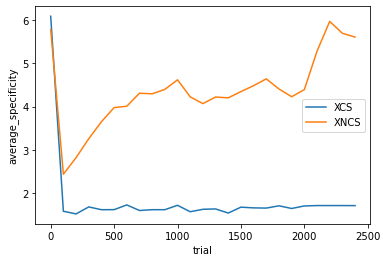

In [20]:
import pandas as pd
import numpy as np

ax = df[['average_specificity', "average_specificity_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS"])



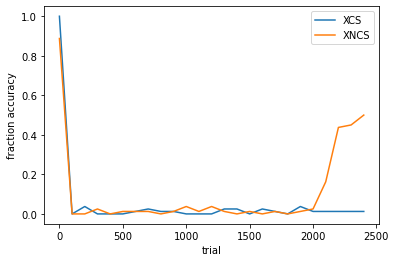

In [21]:
ax = df[['fraction_accuracy', "fraction_accuracy_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XCS","XNCS"])

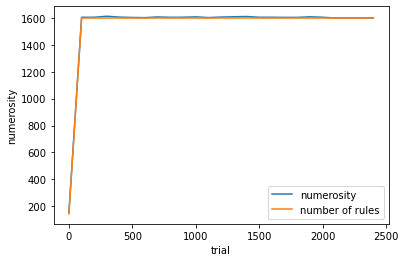

In [22]:
ax = df[['numerosity', 'numerosity_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("numerosity")
ax.legend(["numerosity", "number of rules"])

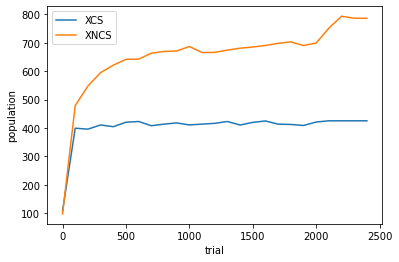

In [23]:
ax = df[['population', "population_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS"])

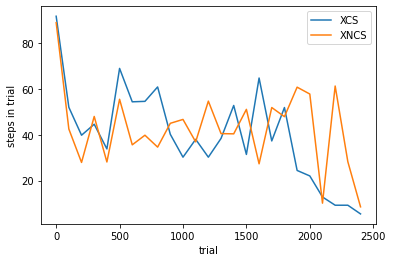

In [24]:
ax = df[['steps_in_trial', 'steps_in_trial_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS"])